In [ ]:
# default_exp plotting

In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Plotting

> API details.

In [ ]:
# export
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional

In [ ]:
# export
plt_style    = {'style':'whitegrid', 'rc':{'patch.edgecolor':'none'}}
plt_sz       = 8
plt_cat_pal  = 'tab10'
plt_tk_sz    = 16     
plt_lbl_sz   = 24
plt_title_sz = 26 
plt_leg_sz   = 16

## Prediction histograms

In [ ]:
# export
def plot_preds(df:pd.DataFrame, bin_edges:np.ndarray=np.linspace(0.,1.,11), pred_name:str='pred') -> None:
    with sns.axes_style(**plt_style), sns.color_palette(plt_cat_pal) as palette:
        plt.figure(figsize=(plt_sz*16/9, plt_sz))
        for t,n in ((0,'Background'),(1,'Signal')):
            cut = (df['gen_target'] == t)
            hist_kws = {} if 'gen_weight' not in df.columns else {'weights':wgt_scale*df.loc[cut, 'gen_weight']}
            sns.distplot(df.loc[cut, pred_name], bins=bin_edges, label=n, hist_kws=hist_kws, norm_hist=True, kde=False)
        plt.legend(fontsize=plt_leg_sz)
        plt.xlabel("Class prediction", fontsize=plt_lbl_sz)
        plt.ylabel(r"$\frac{1}{N}\ \frac{dN}{dp}$", fontsize=plt_lbl_sz)
        plt.xticks(fontsize=plt_tk_sz)
        plt.yticks(fontsize=plt_tk_sz)
        plt.show() 

In [ ]:
s,b = np.random.normal(1,0.5,1000),np.random.normal(0,0.5,1000)
s,b = s[(s<1)&(s>0)][:,None],b[(b<1)&(b>0)][:,None]
s,b = np.hstack((s,np.ones_like(s))),np.hstack((b,np.zeros_like(b)))
d = np.vstack((s,b))
df = pd.DataFrame({'pred':d[:,0],'gen_target':d[:,1]})

In [ ]:
df.head()

,pred,gen_target
0,0.817535,1.0
1,0.648555,1.0
2,0.882199,1.0
3,0.848070,1.0
4,0.635977,1.0


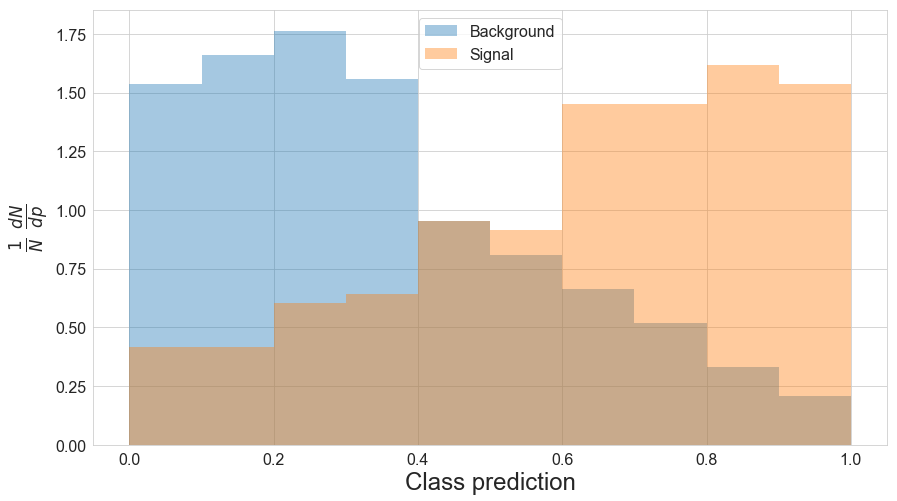

In [ ]:
plot_preds(df)